<img src="https://raw.githubusercontent.com/rhatiro/Curso_EBAC-Profissao_Cientista_de_Dados/main/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 12** | Exercício 1

Aluno [Lays Félix](https://www.linkedin.com/in/laysfelixbusiness)<br>
Data: 13 de maio de 2024

---

# Regressão 01 - tarefa 01

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Modelo de regressão

In [3]:
reg_tip = smf.ols(formula='tip ~ net_bill', 
                  data=tips
                 ).fit()

reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.02e-23
Time:                        13:21:13   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
tips['tip_predict'] = round(reg_tip.predict(tips),2)
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_predict
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,2.92
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.07
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.35
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.41
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,3.63
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,3.83
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,3.38
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,2.93


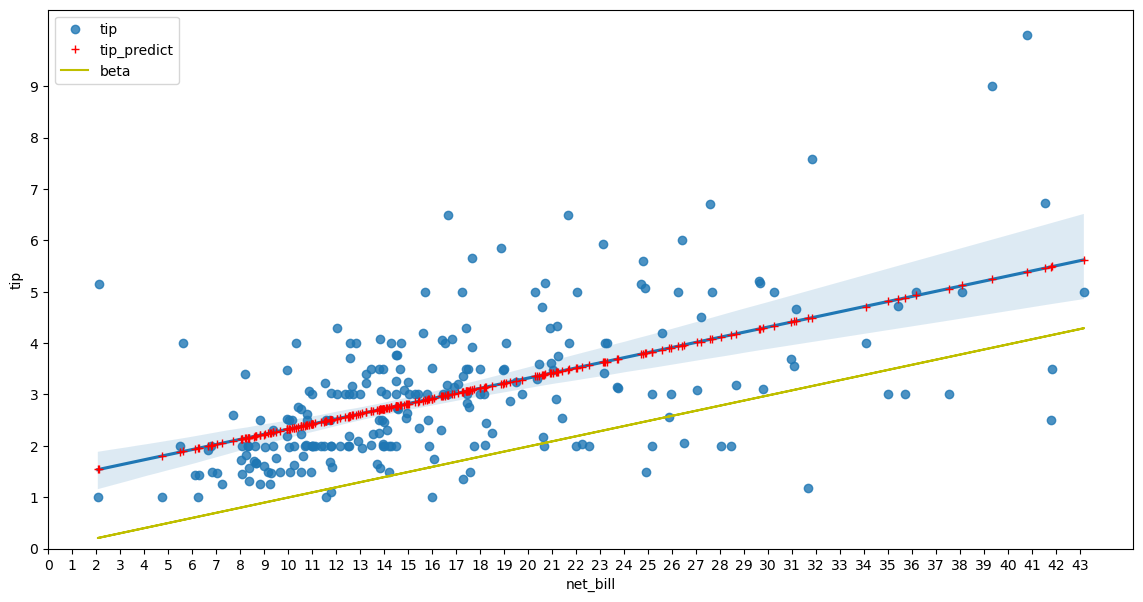

In [6]:
# Gráfico de dispesão

plt.figure(figsize=(14,7))

sns.regplot(x='net_bill', y='tip', data=tips, label='tip')

plt.plot(tips['net_bill'], tips['tip_predict'], 'r+', label='tip_predict')

x = tips['net_bill']
y = x * reg_tip.params.net_bill
plt.plot(x, y, '-y', label='beta')

plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xticks(ticks=np.arange(stop=tips['net_bill'].max(), step=1))
plt.yticks(ticks=np.arange(stop=tips['tip'].max(), step=1))

plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [7]:
reg = smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.02e-23
Time:                        13:22:24   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
tips['tip_pct_predict'] = reg.predict(tips)

In [9]:
tips[['net_bill','tip','tip_predict','tip_pct','tip_pct_predict']]

,net_bill,tip,tip_predict,tip_pct,tip_pct_predict
0,15.98,1.01,2.92,0.063204,2.918050
1,8.68,1.66,2.19,0.191244,2.192915
2,17.51,3.50,3.07,0.199886,3.070031
3,20.37,3.31,3.35,0.162494,3.354125
4,20.98,3.61,3.41,0.172069,3.414719
...,...,...,...,...,...
239,23.11,5.92,3.63,0.256166,3.626300
240,25.18,2.00,3.83,0.079428,3.831920
241,20.67,2.00,3.38,0.096759,3.383925
242,16.07,1.75,2.93,0.108899,2.926990


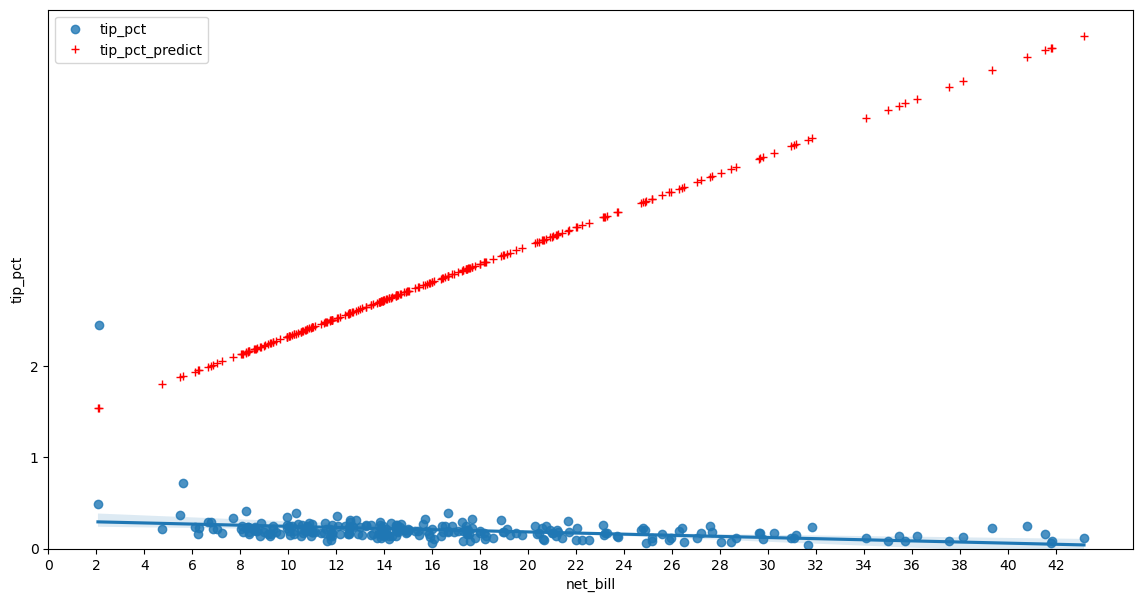

In [10]:
# Gráfico de dispersão

plt.figure(figsize=(14,7))

sns.regplot(x='net_bill', y='tip_pct', data=tips, label='tip_pct')
plt.plot(tips['net_bill'], tips['tip_pct_predict'], 'r+', label='tip_pct_predict')

plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xticks(ticks=np.arange(stop=tips['net_bill'].max(), step=2))
plt.yticks(ticks=np.arange(stop=tips['tip_pct'].max(), step=1))

plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [11]:
tips[['tip','tip_pct','net_bill']].corr()

,tip,tip_pct,net_bill
tip,1.000000,0.241572,0.576663
tip_pct,0.241572,1.000000,-0.302144
net_bill,0.576663,-0.302144,1.000000


No primeiro gráfico a gorjeta (tip) não ultrapassa o  valor a 4.

No último gráfico a gorjeta (tip_pct) está crescendo continuamente conforme a conta sem gorgeta (net_bill)
cai, sugerindo que quando tip_pct aumenta, net_bill tende a diminuir.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [12]:
# 1. obtenha o valor predito pred para tip_pct 
#(dica, veja o atributo reg.fittedvalues)

reg.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [13]:
# 2. obtenha o valor predito para tip como 
# tip_pct * net_bill

reg.fittedvalues * tips.net_bill

0      46.630446
1      19.034500
2      53.756242
3      68.323532
4      71.640801
         ...    
239    83.803782
240    96.487751
241    69.945737
242    47.036737
243    45.733339
Length: 244, dtype: float64

In [14]:
# 3. calcule o R² do modelo para tip

r2 = r2_score(y_true=tips['tip'], 
              y_pred=reg.fittedvalues * tips.net_bill)

print("Coeficiente de determinação (𝑅2) do modelo para tip:", r2)

Coeficiente de determinação (𝑅2) do modelo para tip: -2563.263877729571


In [15]:
# 4. compare esse R² com o do item 1

print('Coeficiente de determinação (𝑅2) dos valores preditos para `tip` como tip_pct(predict) * net_bill:', 
      round(r2 * 100, 2), '%')

print('Coeficiente de determinação (𝑅2) do modelo `reg_tip`:', 
      round(reg_tip.rsquared * 100, 2), '%')

print('Coeficiente de determinação (𝑅2) do modelo `reg_tip_pct`:', 
      round(reg.rsquared * 100, 2), '%')

Coeficiente de determinação (𝑅2) dos valores preditos para `tip` como tip_pct(predict) * net_bill: -256326.39 %
Coeficiente de determinação (𝑅2) do modelo `reg_tip`: 33.25 %
Coeficiente de determinação (𝑅2) do modelo `reg_tip_pct`: 33.25 %
